In [2]:
import pandas as pd 
from pandas import Series
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot  
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

import pmdarima as pm
from pmdarima import auto_arima 
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import nsdiffs
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn import datasets

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [16]:
#Importing data
Chengdu = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/ChengduPM20100101_20151231.csv")
#Chengdu

In [20]:
#Delet non-useful data
Chengdu.drop(['PM_Caotangsi', 'PM_Shahepu', 'season', 'precipitation', 'Iprec'], 
               axis=1,
              inplace=True)

In [13]:
Chengdu.dropna(axis=0, how="any",inplace=True)

In [18]:
# from datetime import datetime
Chengdu['Time'] = pd.to_datetime(Chengdu['year'].map(str) +"/"+ Chengdu['month'].map(str) +"/"+ Chengdu['day'].map(str)+" "+Chengdu['hour'].map(str)+":00:00")
#Beijing

In [15]:
Chengdu.groupby(['year']).size()

year
2012    4405
2013    6893
2014    8467
2015    8630
dtype: int64

In [22]:
by_hour = Chengdu.groupby(['Time']).mean()
by_hour.head()

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws
Time,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,4.0,81.20,1022.0,7.0,1.0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,4.0,86.99,1022.0,6.0,1.0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,4.0,86.99,1021.0,6.0,1.0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,3.0,86.89,1021.0,5.0,1.0
2010-01-01 04:00:00,5,2010,1,1,4,NaN,2.0,86.79,1021.0,4.0,1.0


In [23]:
by_hour.index = pd.to_datetime(by_hour.index, 
                             format='%d-%m-%Y %H:%M:%S')
by_hour = by_hour.set_index(by_hour.index).asfreq('H')
by_hour = by_hour.fillna(method='ffill')

print(by_hour.index)

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2015-12-31 14:00:00', '2015-12-31 15:00:00',
               '2015-12-31 16:00:00', '2015-12-31 17:00:00',
               '2015-12-31 18:00:00', '2015-12-31 19:00:00',
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=52584, freq='H')


In [24]:
by_hour['Time'] = by_hour.index
by_hour['Time']

Time
2010-01-01 00:00:00   2010-01-01 00:00:00
2010-01-01 01:00:00   2010-01-01 01:00:00
2010-01-01 02:00:00   2010-01-01 02:00:00
2010-01-01 03:00:00   2010-01-01 03:00:00
2010-01-01 04:00:00   2010-01-01 04:00:00
                              ...        
2015-12-31 19:00:00   2015-12-31 19:00:00
2015-12-31 20:00:00   2015-12-31 20:00:00
2015-12-31 21:00:00   2015-12-31 21:00:00
2015-12-31 22:00:00   2015-12-31 22:00:00
2015-12-31 23:00:00   2015-12-31 23:00:00
Freq: H, Name: Time, Length: 52584, dtype: datetime64[ns]

In [33]:
data_13 = by_hour[(by_hour['Time'] >=pd.to_datetime('20140101030000')) & (by_hour['Time'] <= pd.to_datetime('20151231030000'))]

In [34]:
data_13 = data_13.set_index(data_13.index).asfreq('d')
data_13

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time
Time,,,,,,,,,,,,
2014-01-01 03:00:00,35068,2014,1,1,3,163.0,3.0,86.89,1024.0,5.0,8.0,2014-01-01 03:00:00
2014-01-02 03:00:00,35092,2014,1,2,3,188.0,2.0,80.92,1019.0,5.0,3.0,2014-01-02 03:00:00
2014-01-03 03:00:00,35116,2014,1,3,3,223.0,1.0,93.08,1026.0,2.0,1.0,2014-01-03 03:00:00
2014-01-04 03:00:00,35140,2014,1,4,3,169.0,0.0,86.58,1026.0,2.0,4.0,2014-01-04 03:00:00
2014-01-05 03:00:00,35164,2014,1,5,3,198.0,1.0,70.27,1017.0,6.0,6.0,2014-01-05 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27 03:00:00,52468,2015,12,27,3,183.0,2.0,93.13,1026.0,3.0,9.0,2015-12-27 03:00:00
2015-12-28 03:00:00,52492,2015,12,28,3,163.0,4.0,100.00,1030.0,4.0,0.0,2015-12-28 03:00:00
2015-12-29 03:00:00,52516,2015,12,29,3,253.0,7.0,100.00,1031.0,7.0,1.0,2015-12-29 03:00:00


In [35]:
by_hour

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time
Time,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,4.0,81.20,1022.0,7.0,1.0,2010-01-01 00:00:00
2010-01-01 01:00:00,2,2010,1,1,1,NaN,4.0,86.99,1022.0,6.0,1.0,2010-01-01 01:00:00
2010-01-01 02:00:00,3,2010,1,1,2,NaN,4.0,86.99,1021.0,6.0,1.0,2010-01-01 02:00:00
2010-01-01 03:00:00,4,2010,1,1,3,NaN,3.0,86.89,1021.0,5.0,1.0,2010-01-01 03:00:00
2010-01-01 04:00:00,5,2010,1,1,4,NaN,2.0,86.79,1021.0,4.0,1.0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580,2015,12,31,19,262.0,7.0,87.28,1027.0,9.0,2.0,2015-12-31 19:00:00
2015-12-31 20:00:00,52581,2015,12,31,20,218.0,7.0,87.28,1028.0,9.0,4.0,2015-12-31 20:00:00
2015-12-31 21:00:00,52582,2015,12,31,21,213.0,7.0,87.28,1028.0,9.0,1.0,2015-12-31 21:00:00


In [28]:
data = by_hour[(by_hour['Time'] >=pd.to_datetime('20130101030000')) & (by_hour['Time'] <= pd.to_datetime('20130112030000'))]
data = data.set_index(data.index).asfreq('H')
data

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time
Time,,,,,,,,,,,,
2013-01-01 03:00:00,26308,2013,1,1,3,135.0,-3.0,80.19,1022.0,0.0,1.0,2013-01-01 03:00:00
2013-01-01 04:00:00,26309,2013,1,1,4,135.0,-1.0,100.00,1021.0,-1.0,0.0,2013-01-01 04:00:00
2013-01-01 05:00:00,26310,2013,1,1,5,135.0,-3.0,92.85,1021.0,-2.0,1.0,2013-01-01 05:00:00
2013-01-01 06:00:00,26311,2013,1,1,6,135.0,-2.0,92.91,1021.0,-1.0,1.0,2013-01-01 06:00:00
2013-01-01 07:00:00,26312,2013,1,1,7,135.0,-2.0,100.00,1021.0,-2.0,0.0,2013-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-11 23:00:00,26568,2013,1,11,23,262.0,2.0,86.79,1027.0,4.0,15.0,2013-01-11 23:00:00
2013-01-12 00:00:00,26569,2013,1,12,0,247.0,2.0,93.13,1027.0,3.0,16.0,2013-01-12 00:00:00
2013-01-12 01:00:00,26570,2013,1,12,1,246.0,2.0,86.79,1027.0,4.0,17.0,2013-01-12 01:00:00


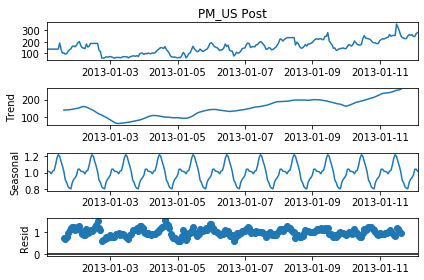

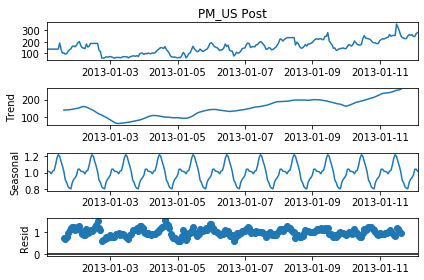

In [29]:
result = seasonal_decompose(data['PM_US Post'],  
                            model ='multiplicative') 
  
# ETS plot  
result.plot()

In [38]:
len(data_13)

730

In [36]:
# Split data into train / test sets 
train = data_13['PM_US Post'].iloc[:len(data_13)-156] 
test = data_13['PM_US Post'].iloc[len(data_13)-156:]

In [37]:
# Fit auto_arima function to dataset 
stepwise_fit = auto_arima(train, start_p = 0, start_q = 0, 
                          max_p = 4, max_q = 4, m=7,
                          start_P = 0, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise  

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 1, 1, 7) (constant=True); AIC=6073.133, BIC=6086.155, Time=0.301 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 7) (constant=True); AIC=6346.034, BIC=6354.714, Time=0.027 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 7) (constant=True); AIC=6012.182, BIC=6029.544, Time=0.432 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 7) (constant=True); AIC=5916.852, BIC=5934.213, Time=0.784 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 7) (constant=False); AIC=6344.467, BIC=6348.807, Time=0.018 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 0, 7) (constant=True); AIC=6221.753, BIC=6234.774, Time=0.242 seconds
Fit ARIMA: (0, 0, 1)x(1, 1, 1, 7) (constant=True); AIC=5929.409, BIC=5951.111, Time=0.468 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: (0, 0, 1)x(0, 1, 2, 7) (constant=True); AIC=5930.327, BIC=5952.029, Time=1.009 seconds
Near non-inver

In [39]:
# To print the summary 
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  574
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -2894.088
Date:                           Fri, 10 Apr 2020   AIC                           5798.175
Time:                                   18:21:20   BIC                           5819.877
Sample:                                        0   HQIC                          5806.645
                                           - 574                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1072      0.058     -1.864      0.062      -0.220       0.006
ar.L1          0.8058      0.033     24.363      0.000       0.741       0.871
ma.L1         -0.2758      0.053     -5.212      0.000      -0.380      -0.172
ma.S.L7       -0.9979      0.244     -4.083      0.000      -1.477      -0.519
sigma2      1507.3486    363.080      4.152      0.000     795.725    2218.973
===================================================================================
Ljung-Box (Q):                       50.16   Jarque-Bera (JB):                41.05
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# Fit a SARIMAX(1, 0, 1)x(0, 1, 1, 7)on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train,  
                order = (1, 0, 1),  
                seasonal_order =(0, 1, 1, 7))

In [48]:
result = model.fit() 

In [49]:
 result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        PM_US Post   No. Observations:                  574
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -2896.356
Date:                           Fri, 10 Apr 2020   AIC                           5800.712
Time:                                   18:22:40   BIC                           5818.073
Sample:                               01-01-2014   HQIC                          5807.487
                                    - 07-28-2015                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8240      0.032     25.805      0.000       0.761       0.887
ma.L1         -0.2885      0.051     -5.642      0.000      -0.389      -0.188
ma.S.L7       -0.9978      0.235     -4.250      0.000      -1.458      -0.538
sigma2      1519.8136    354.717      4.285      0.000     824.580    2215.047
===================================================================================
Ljung-Box (Q):                       46.92   Jarque-Bera (JB):                41.98
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

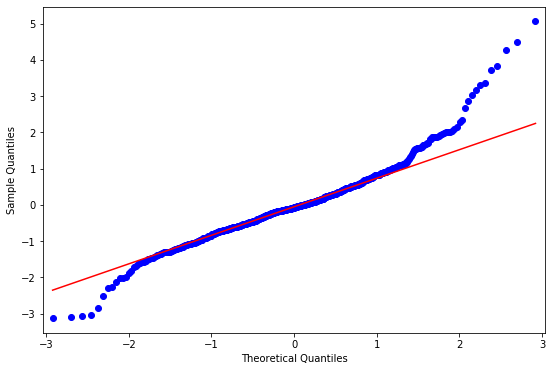

In [50]:
resid = result.resid
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

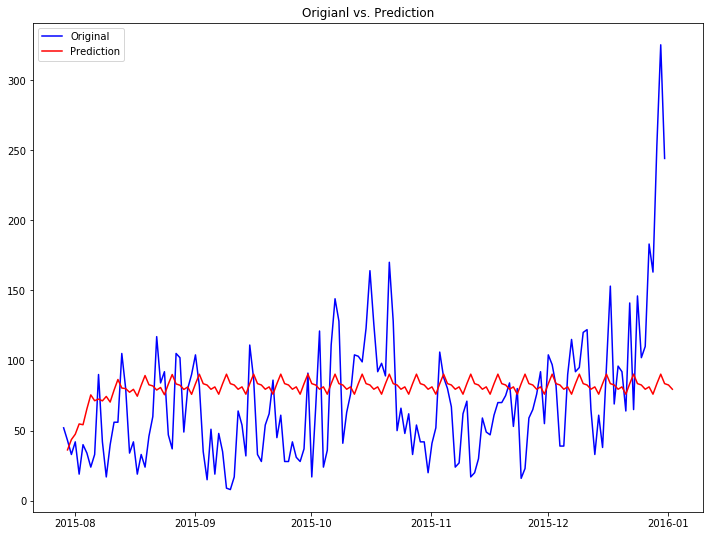

In [51]:
predict_ARMA = result.predict(start =575, end = 731) 
#print(predict_ARIMA) 

plt.figure(figsize=(12,9)) 
orig = plt.plot(test, color='blue', label='Original') 
pred = plt.plot(predict_ARMA, color='red', label='Prediction' ) 
plt.legend(loc='best') 
plt.title('Origianl vs. Prediction') 
plt.show(block=False) 